Review Analysis of Amazon Dataset

In [10]:
!pip install nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/nisha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /Users/nisha/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
df = pd.read_csv('amazon_review_full_csv/train.csv', delimiter=',', header=None)

In [4]:
df.head()

,0,1,2
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...


In [6]:
df.columns = ['Rating',"Review_Title", "Review"]

In [7]:
df.shape

(3000000, 3)

In [8]:
df.head()

,Rating,Review_Title,Review
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...


<h1>DATA WRANGLING</h1>

# 1. Check for missing values

In [9]:
df.isnull().mean()*100

Rating          0.000000
Review_Title    0.006267
Review          0.000000
dtype: float64

In [10]:
df.isnull().sum()

Rating            0
Review_Title    188
Review            0
dtype: int64

# Out of 3000000, there are 188 missing values , Since the missing values are in title, it may not make difference in finding the analysis, so this can be ignored.

# 2. Checking DataTyes are correct.

In [11]:
data_types = df.dtypes
print(data_types)

Rating           int64
Review_Title    object
Review          object
dtype: object


In [12]:
# converting the Columns to appropriate dataType for Review_Title and Review
df["Review_Title"] = df["Review_Title"].astype(str)
df["Review"] = df["Review"].astype(str)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Rating        int64 
 1   Review_Title  object
 2   Review        object
dtypes: int64(1), object(2)
memory usage: 68.7+ MB


In [14]:
df['Review_Title'] = df['Review_Title'].astype(str)
df["Review"] = df["Review"].astype(str)

In [15]:
df.dtypes

Rating           int64
Review_Title    object
Review          object
dtype: object

In [16]:
print(type(df['Review_Title'][0]))  # Should print <class 'str'>
print(type(df['Review'][0]))        # Should print <class 'str'>

<class 'str'>
<class 'str'>


In [17]:
# checking Duplicate values

duplicated = df[df.duplicated()]
print(duplicated)

Empty DataFrame
Columns: [Rating, Review_Title, Review]
Index: []


In [18]:
# There are no Duplicate Reviews

In [19]:
# Checking Duplicates based on specific column
dup1 = df[df.duplicated(subset=['Rating','Review_Title'])]
dup2 = df[df.duplicated(subset=['Rating','Review'])]

In [20]:
dup1.sort_values(by='Review_Title')

,Rating,Review_Title,Review
858263,3,!,Our Lady Of Weight Loss has Miraculous and Mot...
1250365,5,!,"This is an incredibly well-researched, well-wr..."
1126169,5,!,This product is awesome! I have friends who ha...
1818343,4,!,The ZZ Top cover is worth the entrance fee alo...
2060684,4,!,Book arrived in stated condition and prior to ...
...,...,...,...
1301070,2,zzzzzzzzzzzzzzzzzzzzzz,I bought this book as a text required for a cl...
2280312,4,~,Good product. Pads that came with it are crap ...
2817352,5,~,"I'm not an avid anime fan, but my friend is. S..."
2456111,1,¡Decepcionante!,Aunque el desempeño de la orquesta es excelent...


In [21]:
df.groupby(df.columns.tolist()).size().reset_index(name='Duplicate_Count').sort_values(by='Duplicate_Count', ascending=False)

,Rating,Review_Title,Review,Duplicate_Count
0,1,!,This book is completely out of date. The probl...,1
1999993,4,Good read on fiction not not-fiction accounts,"If this were a real story, WOW, but alas it is...",1
1999995,4,Good read on the strength of teamwork and working,together toward a common goal. Nice reference ...,1
1999996,4,Good read overall,Overall this was a good book. It was a very ea...,1
1999997,4,Good read that encourages the reader to think,Generally well written story - with the except...,1
...,...,...,...,...
1000001,2,Shotgun Wedding,Problem here is that it isn't Barber's book. C...,1
1000002,2,Shotgun stock kit,It was very difficult to install. It was not l...,1
1000003,2,Shotgun writing style didn't work for me,"If I had to sum this book up in one word, it w...",1
1000004,2,"Shots are too distant, but okay for watching w...",If you are looking for an exercise video that ...,1


In [22]:
df[df['Review_Title']=='3 books on learning frontpage 2003']

,Rating,Review_Title,Review


In [23]:
print(dup1)

         Rating     Review_Title  \
95            2     Not the best   
103           1  I got fooled...   
202           2    Disappointing   
297           3   Mixed feelings   
555           2     disappointed   
...         ...              ...   
2999986       3       Incomplete   
2999987       2  Not the Best...   
2999992       2   Too simplistic   
2999995       1    Don't do it!!   
2999998       3   Hard to clean!   

                                                    Review  
95       I agree, the CDs are a much needed help, since...  
103      I did not know this was the audio cd of the ga...  
202      I bought this book because I am a nonogram (al...  
297      Some beautiful scenery early on and nice roman...  
555      I think this is a case of my expectations bein...  
...                                                    ...  
2999986  The three films in this set are excellent, abs...  
2999987  I bought this CD expecting it to be the same t...  
2999992  While Mr.

In [24]:
dup2.head()

,Rating,Review_Title,Review
1072,1,Wouldn't stay up,The band was far too thin and would roll down ...
7002,2,lesson in the depravity of man,"As I opened this book, I thought to myself ""Wo..."
12273,3,Shows Its Age,"Unfortunately, ""20,000 Leagues Under the Sea"" ..."
15487,1,Dumb adaptation that does not try to be even r...,Lackluster adaptation of the vertigo comic boo...
15531,1,What a letdown.,"Shameful attempt at a hybrid of horror, action..."


In [25]:
# doubt - are these duplicates ?

# DATA WRANGLING  - NLP

In [26]:
df.Rating.value_counts()

Rating
3    600000
5    600000
4    600000
1    600000
2    600000
Name: count, dtype: int64

In [27]:
df.head()

,Rating,Review_Title,Review
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...


In [28]:
#1. Rule Based Labelling
def rating_sentiment(rating):
    if rating ==3:
        return "Neutral"  
    elif rating > 3:
        return "Positive" 
    else:
        return "Negative"
    
df["Rating_Sentiment"] = df["Rating"].apply(rating_sentiment)

In [29]:
df.head()

,Rating,Review_Title,Review,Rating_Sentiment
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...,Neutral
1,5,Inspiring,I hope a lot of people hear this cd. We need m...,Positive
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,Positive
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...,Positive
4,5,Too good to be true,Probably the greatest soundtrack in history! U...,Positive


In [30]:
df['Rating_Sentiment'].value_counts()

Rating_Sentiment
Positive    1200000
Negative    1200000
Neutral      600000
Name: count, dtype: int64

In [31]:
# Processing all the strings to lower case
df['Review_Title'] = df['Review_Title'].str.lower()
df['Review'] = df['Review'].str.lower()

In [32]:
df.head()

,Rating,Review_Title,Review,Rating_Sentiment
0,3,more like funchuck,gave this to my dad for a gag gift after direc...,Neutral
1,5,inspiring,i hope a lot of people hear this cd. we need m...,Positive
2,5,the best soundtrack ever to anything.,i'm reading a lot of reviews saying that this ...,Positive
3,4,chrono cross ost,the music of yasunori misuda is without questi...,Positive
4,5,too good to be true,probably the greatest soundtrack in history! u...,Positive


In [33]:
# Rearranging the column
column_to_move = df.pop('Rating_Sentiment')
df.insert(1,'Rating_Sentiment',column_to_move)

In [34]:
df.head()

,Rating,Rating_Sentiment,Review_Title,Review
0,3,Neutral,more like funchuck,gave this to my dad for a gag gift after direc...
1,5,Positive,inspiring,i hope a lot of people hear this cd. we need m...
2,5,Positive,the best soundtrack ever to anything.,i'm reading a lot of reviews saying that this ...
3,4,Positive,chrono cross ost,the music of yasunori misuda is without questi...
4,5,Positive,too good to be true,probably the greatest soundtrack in history! u...


In [35]:
df['Review_Count'] = df['Review'].str.len()
df['Review_Title_count'] = df['Review_Title'].str.len()

In [36]:
df.head()

,Rating,Rating_Sentiment,Review_Title,Review,Review_Count,Review_Title_count
0,3,Neutral,more like funchuck,gave this to my dad for a gag gift after direc...,93,18
1,5,Positive,inspiring,i hope a lot of people hear this cd. we need m...,204,9
2,5,Positive,the best soundtrack ever to anything.,i'm reading a lot of reviews saying that this ...,470,37
3,4,Positive,chrono cross ost,the music of yasunori misuda is without questi...,393,16
4,5,Positive,too good to be true,probably the greatest soundtrack in history! u...,377,19


In [37]:
!pip install textblob

In [39]:
df.head()

,Rating,Rating_Sentiment,Review_Title,Review,Review_Count,Review_Title_count
0,3,Neutral,more like funchuck,gave this to my dad for a gag gift after direc...,93,18
1,5,Positive,inspiring,i hope a lot of people hear this cd. we need m...,204,9
2,5,Positive,the best soundtrack ever to anything.,i'm reading a lot of reviews saying that this ...,470,37
3,4,Positive,chrono cross ost,the music of yasunori misuda is without questi...,393,16
4,5,Positive,too good to be true,probably the greatest soundtrack in history! u...,377,19


In [40]:
from nltk import word_tokenize

In [41]:
df['title_word_tokenize_count'] = df['Review_Title'].apply(word_tokenize)
df['Review_word_tokenize_count'] = df['Review'].apply(word_tokenize)

In [42]:
df.head()

,Rating,Rating_Sentiment,Review_Title,Review,Review_Count,Review_Title_count,title_word_tokenize_count,Review_word_tokenize_count
0,3,Neutral,more like funchuck,gave this to my dad for a gag gift after direc...,93,18,"[more, like, funchuck]","[gave, this, to, my, dad, for, a, gag, gift, a..."
1,5,Positive,inspiring,i hope a lot of people hear this cd. we need m...,204,9,[inspiring],"[i, hope, a, lot, of, people, hear, this, cd, ..."
2,5,Positive,the best soundtrack ever to anything.,i'm reading a lot of reviews saying that this ...,470,37,"[the, best, soundtrack, ever, to, anything, .]","[i, 'm, reading, a, lot, of, reviews, saying, ..."
3,4,Positive,chrono cross ost,the music of yasunori misuda is without questi...,393,16,"[chrono, cross, ost]","[the, music, of, yasunori, misuda, is, without..."
4,5,Positive,too good to be true,probably the greatest soundtrack in history! u...,377,19,"[too, good, to, be, true]","[probably, the, greatest, soundtrack, in, hist..."


In [43]:
df = df.rename(columns={'Review_Count':'Review_str_len', 'Review_Title_count':'Title_str_len', 'title_word_tokenize_count':'title_word_tokenize', 'Review_word_tokenize_count':'Review_word_tokenize'})

In [44]:
df.head()

,Rating,Rating_Sentiment,Review_Title,Review,Review_str_len,Title_str_len,title_word_tokenize,Review_word_tokenize
0,3,Neutral,more like funchuck,gave this to my dad for a gag gift after direc...,93,18,"[more, like, funchuck]","[gave, this, to, my, dad, for, a, gag, gift, a..."
1,5,Positive,inspiring,i hope a lot of people hear this cd. we need m...,204,9,[inspiring],"[i, hope, a, lot, of, people, hear, this, cd, ..."
2,5,Positive,the best soundtrack ever to anything.,i'm reading a lot of reviews saying that this ...,470,37,"[the, best, soundtrack, ever, to, anything, .]","[i, 'm, reading, a, lot, of, reviews, saying, ..."
3,4,Positive,chrono cross ost,the music of yasunori misuda is without questi...,393,16,"[chrono, cross, ost]","[the, music, of, yasunori, misuda, is, without..."
4,5,Positive,too good to be true,probably the greatest soundtrack in history! u...,377,19,"[too, good, to, be, true]","[probably, the, greatest, soundtrack, in, hist..."


In [45]:
df['title_word_tokenize_count'] = df['title_word_tokenize'].apply(len)
df['Review_word_tokenize_count'] = df['Review_word_tokenize'].apply(len)

In [46]:
df.head()

,Rating,Rating_Sentiment,Review_Title,Review,Review_str_len,Title_str_len,title_word_tokenize,Review_word_tokenize,title_word_tokenize_count,Review_word_tokenize_count
0,3,Neutral,more like funchuck,gave this to my dad for a gag gift after direc...,93,18,"[more, like, funchuck]","[gave, this, to, my, dad, for, a, gag, gift, a...",3,24
1,5,Positive,inspiring,i hope a lot of people hear this cd. we need m...,204,9,[inspiring],"[i, hope, a, lot, of, people, hear, this, cd, ...",1,44
2,5,Positive,the best soundtrack ever to anything.,i'm reading a lot of reviews saying that this ...,470,37,"[the, best, soundtrack, ever, to, anything, .]","[i, 'm, reading, a, lot, of, reviews, saying, ...",7,101
3,4,Positive,chrono cross ost,the music of yasunori misuda is without questi...,393,16,"[chrono, cross, ost]","[the, music, of, yasunori, misuda, is, without...",3,76
4,5,Positive,too good to be true,probably the greatest soundtrack in history! u...,377,19,"[too, good, to, be, true]","[probably, the, greatest, soundtrack, in, hist...",5,81


In [47]:
df = df.rename(columns={'title_word_tokenize_count':'title_wtoken_cnt','Review_word_tokenize_count':'Review_wtoken_cnt'})

In [48]:
df.head()

,Rating,Rating_Sentiment,Review_Title,Review,Review_str_len,Title_str_len,title_word_tokenize,Review_word_tokenize,title_wtoken_cnt,Review_wtoken_cnt
0,3,Neutral,more like funchuck,gave this to my dad for a gag gift after direc...,93,18,"[more, like, funchuck]","[gave, this, to, my, dad, for, a, gag, gift, a...",3,24
1,5,Positive,inspiring,i hope a lot of people hear this cd. we need m...,204,9,[inspiring],"[i, hope, a, lot, of, people, hear, this, cd, ...",1,44
2,5,Positive,the best soundtrack ever to anything.,i'm reading a lot of reviews saying that this ...,470,37,"[the, best, soundtrack, ever, to, anything, .]","[i, 'm, reading, a, lot, of, reviews, saying, ...",7,101
3,4,Positive,chrono cross ost,the music of yasunori misuda is without questi...,393,16,"[chrono, cross, ost]","[the, music, of, yasunori, misuda, is, without...",3,76
4,5,Positive,too good to be true,probably the greatest soundtrack in history! u...,377,19,"[too, good, to, be, true]","[probably, the, greatest, soundtrack, in, hist...",5,81


In [59]:
from wordcloud import WordCloud

#Creating word Cloud
def showWordCloud(wordCloud):
    plt.imshow(wordCloud)
    plt.show()

In [53]:
all_reviews = ''.join(df["Review"].astype(str))

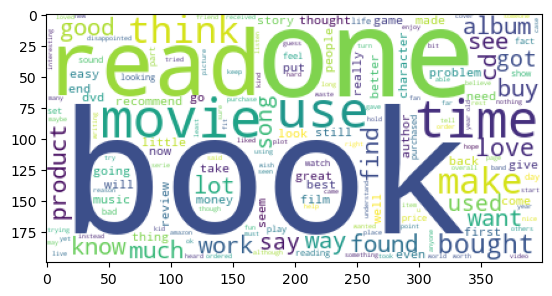

In [60]:
wc_beforeStop = WordCloud(background_color="white").generate(all_reviews)
showWordCloud(wc_beforeStop)

In [55]:
!pip install threadpoolctl

In [56]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS

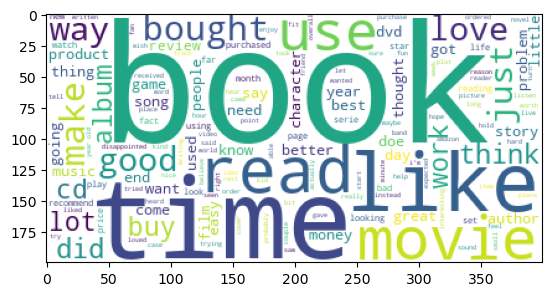

In [61]:
wc_after_sk_Stop = WordCloud(background_color="white", stopwords=ENGLISH_STOP_WORDS).generate(all_reviews)
showWordCloud(wc_after_sk_Stop)

In [68]:
#Creating Stop Words
stop_words_list = list(ENGLISH_STOP_WORDS)+["Review","Reviews", "Amazon", "amazon","reviews","review"]

In [82]:
# Using Stemmer and WordLemmetizer
from nltk.stem import PorterStemmer, WordNetLemmatizer

porterStemmer = PorterStemmer()
wordNetLemmetizer = WordNetLemmatizer()

In [83]:
def porter_stemmer_tokenizer(word_tokenized):
    return [porterStemmer.stem(tokens) for tokens in word_tokenized]

def wnet_lemmatizer_tokenizer(word_tokenized):
    return [wordNetLemmetizer.lemmatize(tokens) for tokens in word_tokenized]

In [84]:
# Porter Stemming    
df["porterStemmer"] = df["Review_word_tokenize"].apply(porter_stemmer_tokenizer)

In [87]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/nisha/nltk_data...


True

In [86]:
df.head()

,Rating,Rating_Sentiment,Review_Title,Review,Review_str_len,Title_str_len,title_word_tokenize,Review_word_tokenize,title_wtoken_cnt,Review_wtoken_cnt,porterStemmer
0,3,Neutral,more like funchuck,gave this to my dad for a gag gift after direc...,93,18,"[more, like, funchuck]","[gave, this, to, my, dad, for, a, gag, gift, a...",3,24,"[gave, thi, to, my, dad, for, a, gag, gift, af..."
1,5,Positive,inspiring,i hope a lot of people hear this cd. we need m...,204,9,[inspiring],"[i, hope, a, lot, of, people, hear, this, cd, ...",1,44,"[i, hope, a, lot, of, peopl, hear, thi, cd, .,..."
2,5,Positive,the best soundtrack ever to anything.,i'm reading a lot of reviews saying that this ...,470,37,"[the, best, soundtrack, ever, to, anything, .]","[i, 'm, reading, a, lot, of, reviews, saying, ...",7,101,"[i, 'm, read, a, lot, of, review, say, that, t..."
3,4,Positive,chrono cross ost,the music of yasunori misuda is without questi...,393,16,"[chrono, cross, ost]","[the, music, of, yasunori, misuda, is, without...",3,76,"[the, music, of, yasunori, misuda, is, without..."
4,5,Positive,too good to be true,probably the greatest soundtrack in history! u...,377,19,"[too, good, to, be, true]","[probably, the, greatest, soundtrack, in, hist...",5,81,"[probabl, the, greatest, soundtrack, in, histo..."


In [88]:
# WordNet Lemmatizer
from nltk.stem import WordNetLemmatizer
df["WordNet_Lemmatizer"] = df["Review_word_tokenize"].apply(wnet_lemmatizer_tokenizer)

In [89]:
df.head()

,Rating,Rating_Sentiment,Review_Title,Review,Review_str_len,Title_str_len,title_word_tokenize,Review_word_tokenize,title_wtoken_cnt,Review_wtoken_cnt,porterStemmer,WordNet_Lemmatizer
0,3,Neutral,more like funchuck,gave this to my dad for a gag gift after direc...,93,18,"[more, like, funchuck]","[gave, this, to, my, dad, for, a, gag, gift, a...",3,24,"[gave, thi, to, my, dad, for, a, gag, gift, af...","[gave, this, to, my, dad, for, a, gag, gift, a..."
1,5,Positive,inspiring,i hope a lot of people hear this cd. we need m...,204,9,[inspiring],"[i, hope, a, lot, of, people, hear, this, cd, ...",1,44,"[i, hope, a, lot, of, peopl, hear, thi, cd, .,...","[i, hope, a, lot, of, people, hear, this, cd, ..."
2,5,Positive,the best soundtrack ever to anything.,i'm reading a lot of reviews saying that this ...,470,37,"[the, best, soundtrack, ever, to, anything, .]","[i, 'm, reading, a, lot, of, reviews, saying, ...",7,101,"[i, 'm, read, a, lot, of, review, say, that, t...","[i, 'm, reading, a, lot, of, review, saying, t..."
3,4,Positive,chrono cross ost,the music of yasunori misuda is without questi...,393,16,"[chrono, cross, ost]","[the, music, of, yasunori, misuda, is, without...",3,76,"[the, music, of, yasunori, misuda, is, without...","[the, music, of, yasunori, misuda, is, without..."
4,5,Positive,too good to be true,probably the greatest soundtrack in history! u...,377,19,"[too, good, to, be, true]","[probably, the, greatest, soundtrack, in, hist...",5,81,"[probabl, the, greatest, soundtrack, in, histo...","[probably, the, greatest, soundtrack, in, hist..."


In [79]:
#Creating CountVectorizer

cnt_vect = CountVectorizer(max_features=100, stop_words=stop_words_list, ngram_range=(1,2), min_df=30)
cnt_vect.fit(df.Review)
cnt_X = cnt_vect.transform(df.Review)
df_cnt_vector_transformed = pd.DataFrame(cnt_X.toarray(), columns= cnt_vect.get_feature_names_out())
print(df_cnt_vector_transformed.head())

   actually  album  author  bad  best  better  big  bit  book  books  ...  ve  \
0         0      0       0    0     0       0    0    0     0      0  ...   0   
1         0      0       0    0     0       0    0    0     0      0  ...   0   
2         0      0       0    0     1       0    0    1     0      0  ...   0   
3         0      0       0    0     0       0    0    0     0      0  ...   0   
4         0      0       0    0     0       1    0    0     0      0  ...   0   

   want  watch  way  work  works  worth  written  year  years  
0     0      0    0     0      0      0        0     0      0  
1     0      0    0     0      0      0        0     0      0  
2     0      0    0     0      0      1        0     0      1  
3     0      0    0     0      0      0        0     0      0  
4     0      0    0     0      0      1        0     0      0  

[5 rows x 100 columns]


In [80]:
# Creating TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=100, stop_words=stop_words_list, ngram_range=(1,2), min_df=30)
tfidf_vect.fit(df.Review)
tfidf_X = tfidf_vect.transform(df.Review)

tfidf_df = pd.DataFrame(tfidf_X.toarray(), columns= tfidf_vect.get_feature_names_out())
print(tfidf_df.head())

   actually  album  author  bad      best    better  big      bit  book  \
0       0.0    0.0     0.0  0.0  0.000000  0.000000  0.0  0.00000   0.0   
1       0.0    0.0     0.0  0.0  0.000000  0.000000  0.0  0.00000   0.0   
2       0.0    0.0     0.0  0.0  0.225909  0.000000  0.0  0.26126   0.0   
3       0.0    0.0     0.0  0.0  0.000000  0.000000  0.0  0.00000   0.0   
4       0.0    0.0     0.0  0.0  0.000000  0.316646  0.0  0.00000   0.0   

   books  ...   ve  want  watch  way  work  works     worth  written  year  \
0    0.0  ...  0.0   0.0    0.0  0.0   0.0    0.0  0.000000      0.0   0.0   
1    0.0  ...  0.0   0.0    0.0  0.0   0.0    0.0  0.000000      0.0   0.0   
2    0.0  ...  0.0   0.0    0.0  0.0   0.0    0.0  0.251830      0.0   0.0   
3    0.0  ...  0.0   0.0    0.0  0.0   0.0    0.0  0.000000      0.0   0.0   
4    0.0  ...  0.0   0.0    0.0  0.0   0.0    0.0  0.383421      0.0   0.0   

      years  
0  0.000000  
1  0.000000  
2  0.240946  
3  0.000000  
4  0.00000

In [38]:
# Detecting sentiment using TextBlob

from textblob import TextBlob

# Polarity refers to the overall sentiment expressed in a text. It indicates whether the sentiment is +ve, -ve or neutral. Range: -1.0 to 1.0
def sentiment_polarity(review):
    return TextBlob(review).sentiment.polarity

# Subjectivity refers to the extent to which a piece of text expresses personal opinions, emotions, beliefs, and judgments rather than factual information. Range 0.0 to 1.0.
def sentiment_subjectivity(review):
    return TextBlob(review).sentiment.subjectivity

#df['polarity'] = df['Review'].apply(sentiment_polarity)
#df['subjectivity'] = df['Review'].apply(sentiment_subjectivity)

# Using spaCy

In [2]:
! pip install spacy

In [17]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [18]:
# dfs - data frame for spacy
dfs = df.copy(deep=True)
dfs.head()

,0,1,2
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...


In [19]:
dfs.columns=["Rating","Review_Title","Review"]
dfs.head()

,Rating,Review_Title,Review
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...


In [ ]:
# Spacy Tokenization

In [8]:

def get_spacy_tokenized(text):
    return [[token.text for token in doc] for doc in nlp.pipe(text, n_process=4)]

In [ ]:
dfs["spacy_tokenized"] = get_spacy_tokenized(dfs["Review"].astype(str).tolist())

In [ ]:
# Spacy lemmas

In [10]:
def get_spacy_lemmas(text):
    return [[token.text for token in doc] for doc in nlp.pipe(text)]

In [20]:
def process_reviews(text):
    chunk_size = 1000
    num_chunks = (len(dfs)+chunk_size-1)//chunk_size

    tokenized_list = []
    lemmatized_list = []
    pos_list = []

    for i in range(num_chunks):
        start = i * chunk_size
        end = min((i + 1) * chunk_size, len(dfs))
        chunk = dfs["Review"][start:end].astype(str).tolist()

        for doc in nlp.pipe(chunk,n_process=4):
            for token in doc:
                tokenized_list.extend([token.text ])
                lemmatized_list.extend([token.lemma_])
                pos_list.extend([token.pos_])

    dfs["spacy_tokenized"] = tokenized_list
    dfs["s_lemmas"] = lemmatized_list
    dfs["s_pos"] = pos_list

In [21]:
process_reviews(dfs["Review"])
print(dfs.head())

Process Process-1406:
Process Process-1405:
Process Process-1407:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/spacy/language.py", line 2395, in _apply_pipes
    texts_with_ctx = receiver.get()
                     ^^^^^^^^^^^^^^
  File "/opt/hom

KeyboardInterrupt: 

In [ ]:
# Spacy sentences

In [ ]:
def get_spacy_sentences(text):
    return [[token.text for token in doc]for doc in nlp.pipe(text,n_process=4)]

In [ ]:
dfs["s_sentence"] = get_spacy_sentences(dfs["Review"].astype(str).tolist())

In [ ]:
# NER - Named Entity Recogonition

In [ ]:
def ner(text):
    chunk_size = 1000
    num_chunks = (len(dfs)+chunk_size-1)//chunk_size

    ent_label_list[]
    ent_type_list[]

    for i in range(num_chunks):
        start = i * chunk_size
        end = min((i + 1) * chunk_size, len(dfs))
        chunk = dfs["Review"][start:end].astype(str).tolist()

        for doc in nlp.pipe(chunk,n_process=4):
            for token in doc.ents:
                ent_label_list.extend(token.label_)
                ent_type_list.extend(token.type_)

    dfs["ner_label"] = ent_label_list
    dfs["ner_type"] = ent_type_list

In [1]:
print(dfs.head())

NameError: name 'dfs' is not defined

# NLP - WRANGLING

In [ ]:
df_1['Review_Title_Tokens_stop_words_removed'] = df_1['Review_Title_Tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df_1['Review_Tokens_stop_words_removed'] = df_1['Review_Tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
df_1.head()

In [ ]:
df_1.to_csv('data_wrangled_reviews_amazon.csv', index=False)